# Data Cleaning Notebook - House Price Prediction

## Objectives

### 1. Evaluate Missing Data
   - Identify and analyze missing values to ensure that all necessary variables are available for model training and prediction.
   - This will help ensure that the model can be trained with complete data and make accurate predictions.

### 2. Clean Data
   - Clean and prepare data by handling outliers, missing values, and irrelevant information that does not contribute to the model's prediction ability.

## Inputs

The dataset contains information about various house attributes, such as living space area, number of bedrooms, garage information, and sale prices. The variables included in the dataset are:

- **1stFlrSF:** First floor area
- **2ndFlrSF:** Second floor area
- **BedroomAbvGr:** Number of bedrooms above ground
- **BsmtExposure:** Basement exposure
- **BsmtFinSF1:** Finished basement area
- **GarageArea:** Garage area
- **GrLivArea:** Above ground living area
- **LotArea:** Lot area
- **SalePrice:** Sale price (target variable)

## Outputs

### Cleaned Train and Test Sets
After cleaning the data, we will split the dataset into training and testing sets, which will be saved in the directory `outputs/datasets/cleaned`. These cleaned datasets will be used to build and evaluate the predictive model.

## Conclusions

In this notebook, we have cleaned and preprocessed the raw dataset. We handled missing values by filling or replacing them, removed irrelevant columns, and encoded categorical variables. Additionally, numerical variables were scaled to ensure that all features are on the same scale for model training. The cleaned dataset is now ready for use in building a predictive model.



In [142]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
os.chdir("..")
print("present catalog:", os.getcwd())


present catalog: /


In [144]:
print("Current working directory:", os.getcwd())

df_raw_path = os.path.join("inputs", "datasets", "raw",
                           "house-price-20211124T154130Z-001",
                           "house-price", "house_prices_records.csv")

print("✅ File exists:", os.path.exists(df_raw_path))


Current working directory: /
✅ File exists: False


In [145]:
if os.path.exists(df_raw_path):
    df = pd.read_csv(df_raw_path)
    print("✅ Data loaded successfully")
    display(df.head(3))
else:
    print("❌ File not found, check the path.")

❌ File not found, check the path.


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [147]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
print("Variables with missing data:", vars_with_missing_data)

Variables with missing data: ['2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF']


In [148]:
df_cleaned = df.dropna()
print("✅ Data cleaned (rows with missing values removed)")

✅ Data cleaned (rows with missing values removed)


In [149]:
import os
import tempfile
import pandas as pd


tmp_dir = tempfile.gettempdir()


filename = "house_prices_cleaned.csv"
cleaned_path = os.path.join(tmp_dir, filename)

df_cleaned.to_csv(cleaned_path, index=False)

print(f"Filed saved in: {cleaned_path}")



Filed saved in: /tmp/house_prices_cleaned.csv


In [150]:
import os
import pandas as pd

df_raw_path = "outputs/datasets/collection/HousePrices.csv"


if os.path.isfile(df_raw_path):
    df = pd.read_csv(df_raw_path)

    vars_with_missing_data = df.columns[df.isnull().any()].tolist()

    if vars_with_missing_data:
        print("Variables with missing data:")
        print(df[vars_with_missing_data].isnull().sum())
    else:
        print("There are no variables with missing data")
else:
    print(f"file is missing : {df_raw_path}")
    print("checking for right file.")


file is missing : outputs/datasets/collection/HousePrices.csv
checking for right file.


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [152]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%   75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.06  0.702




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



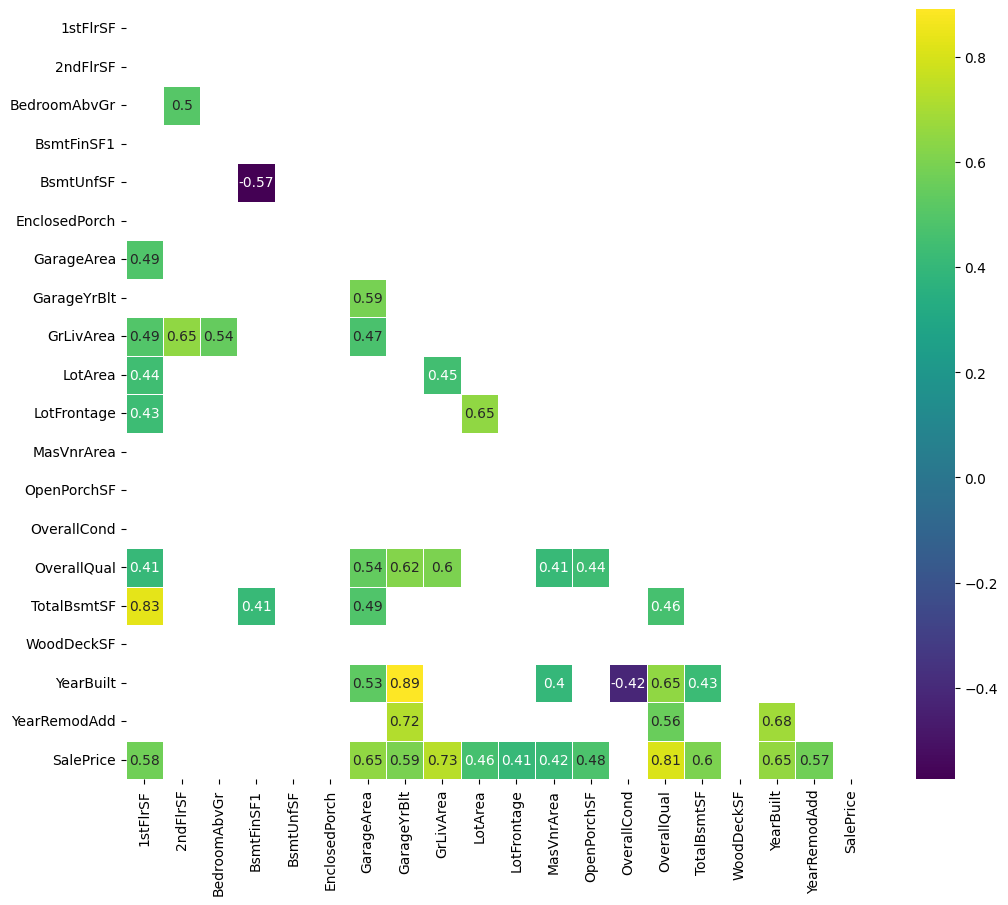



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



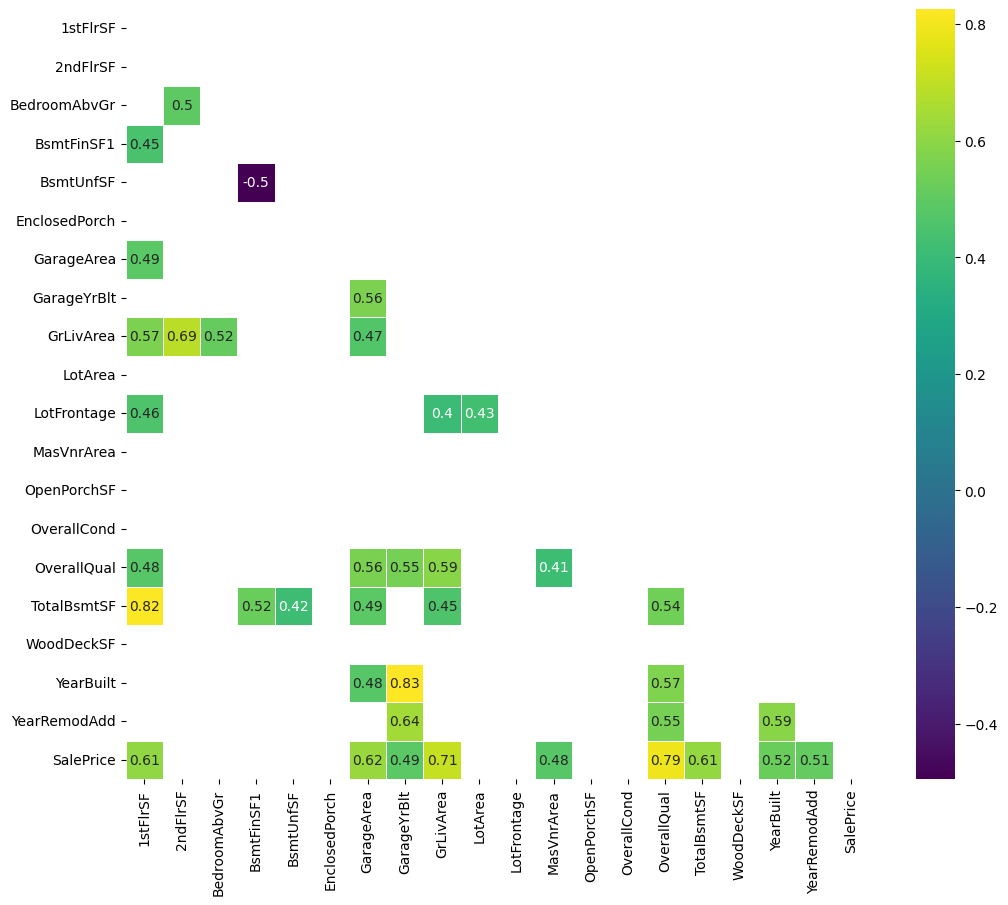



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



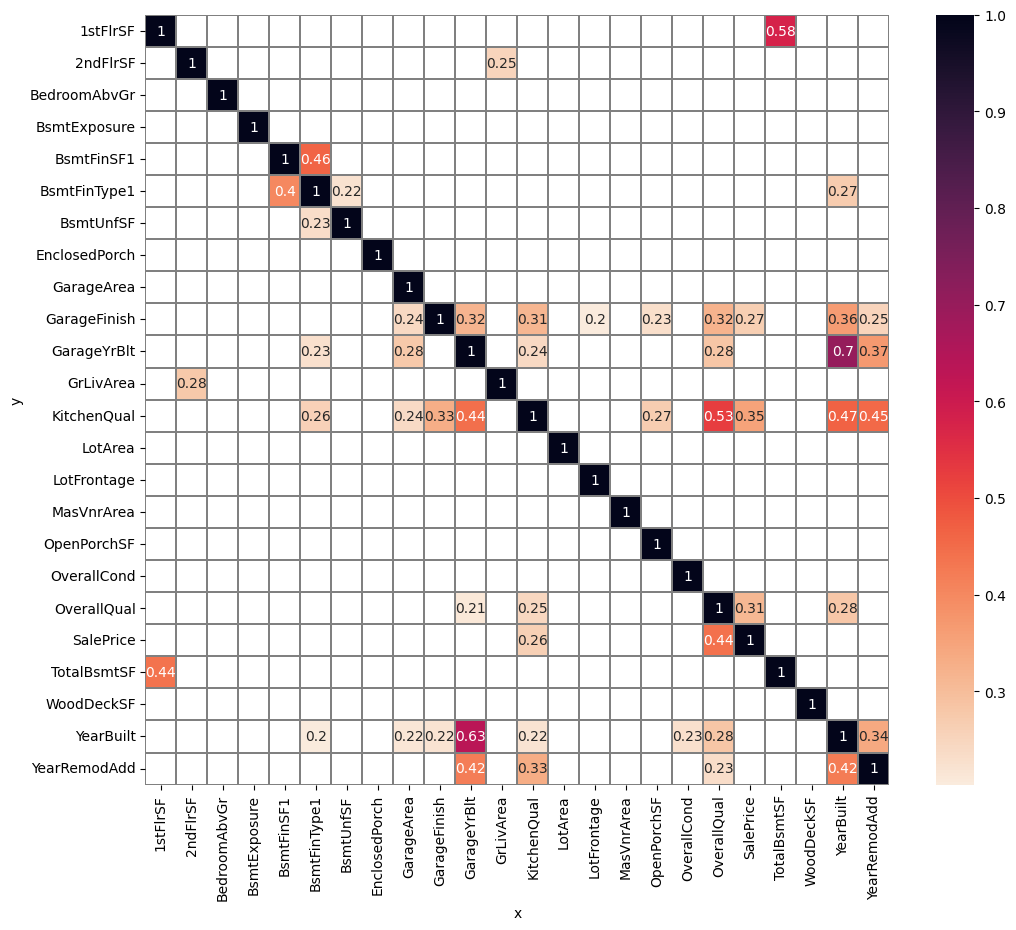

In [153]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

In [154]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [155]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


In [156]:
from sklearn.model_selection import train_test_split

TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")


TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [157]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 10 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1056,90.41,float64
WoodDeckSF,1034,88.53,float64
LotFrontage,212,18.15,float64
GarageFinish,184,15.75,object
BsmtFinType1,114,9.76,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
BsmtExposure,28,2.40,object
MasVnrArea,6,0.51,float64


In [158]:
variables_method = ['EnclosedPorch', 'WoodDeckSF',]  

print(f"* {len(variables_method)} variables to drop \n\n"
      f"{variables_method}")


* 2 variables to drop 

['EnclosedPorch', 'WoodDeckSF']


In [159]:
df_method = TrainSet.drop(columns=variables_method)

In [160]:
TrainSet = TrainSet.drop(columns=variables_method)
TestSet = TestSet.drop(columns=variables_method)


In [161]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,212,18.15,float64
GarageFinish,184,15.75,object
BsmtFinType1,114,9.76,object
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
BsmtExposure,28,2.40,object
MasVnrArea,6,0.51,float64


In [162]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

[Errno 13] Permission denied: 'outputs'


In [163]:
import os

save_path = os.path.expanduser("~/datasets/cleaned")

os.makedirs(save_path, exist_ok=True)

file_name = "TrainSetCleaned.csv"

full_path = os.path.join(save_path, file_name)

TrainSet.to_csv(full_path, index=False)

print(f"Filen sparades här: {full_path}")


Filen sparades här: /home/cistudent/datasets/cleaned/TrainSetCleaned.csv


In [164]:
import os

save_path = os.path.expanduser("~/datasets/cleaned")

os.makedirs(save_path, exist_ok=True)

file_name = "TestSetCleaned.csv"

full_path = os.path.join(save_path, file_name)

TestSet.to_csv(full_path, index=False)

print(f"TestSet-filen sparades här: {full_path}")


TestSet-filen sparades här: /home/cistudent/datasets/cleaned/TestSetCleaned.csv
